# **Installing Libraries**

In [76]:
!pip install nltk==3.5

In [77]:
!pip install textblob

In [78]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from collections import Counter

# **Reading Data**

In [80]:
News_Data = pd.read_csv("news.csv")

# **Data Preprocessing**

In [81]:
News_Data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [82]:
News_Data.duplicated().sum()

218

In [83]:
News_Data = News_Data.drop_duplicates()
News_Data.duplicated().sum()

0

In [84]:
x = News_Data.iloc[:,1:3]
y = News_Data.iloc[:,-1]

In [85]:
stopwordsObj = stopwords.words('english')
Lemmatizer = WordNetLemmatizer()

def cleanData(row):
  text = row.lower()
  tokens = word_tokenize(text)
  words_without_stopwords = [word for word in tokens if word not in stopwordsObj]
  words_without_punct = [word for word in words_without_stopwords if word.isalnum() and word]
  lemmatized_words = [Lemmatizer.lemmatize(word) for word in words_without_punct]

  return lemmatized_words

In [86]:
News_Data['text'] = News_Data['text'].apply(cleanData)
News_Data['title'] = News_Data['title'].apply(cleanData)

In [87]:
News_Data['title'] = News_Data['title'].apply(lambda x: ' '.join(x))
News_Data['text'] = News_Data['text'].apply(lambda x: ' '.join(x))

In [95]:
#News_Data['Joined_Data'] = News_Data['title'] + News_Data['text']
News_Data['Joined_Data']=News_Data['text']

# **Data Preparation**

In [96]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(News_Data['Joined_Data'], y)


"""-----------------------------------------"""
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
"""-----------------------------------------"""

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(News_Data['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

xtrain_tfidf.data

array([0.03221216, 0.17799636, 0.01885079, ..., 0.24106297, 0.15933753,
       0.06006517])

# **Saving model**

In [97]:
import os
from joblib import dump

def save_model(model, filename):
    # Ensure that the 'Models' directory exists
    if not os.path.exists('Models'):
        os.makedirs('Models')

    # Construct the full file path
    filepath = os.path.join('Models', filename)

    # Check if the file exists
    if os.path.exists(filepath):
        # Overwrite the model to file
        dump(model, filepath)
        print(f"Model Overwritten to '{filepath}'.")
    else:
        # Save the model to file
        dump(model, filepath)
        print(f"Model saved to '{filepath}'.")


def load_model(filename):
    filepath = 'Models/' + filename  # Construct the full file path
    # Check if the file exists
    if os.path.exists(filepath):
        # Load the model from file
        model = joblib.load(filepath)
        print(f"Model loaded from '{filepath}'.")
        return model
    else:
        print(f"File '{filepath}' does not exist.")
        return None


# **Classification**

In [98]:
pac = PassiveAggressiveClassifier(max_iter=10, random_state=20)
pac.fit(xtrain_tfidf, train_y)
save_model(pac, 'PassiveAggressiveClassifier.pkl')

"""
y_pred = pac.predict(xvalid_tfidf)

accuracy = accuracy_score(valid_y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(valid_y, y_pred)
print("Confusion Matrix:\n", conf_matrix)
"""

Model Overwritten to 'Models/PassiveAggressiveClassifier.pkl'.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


'\ny_pred = pac.predict(xvalid_tfidf)\n\naccuracy = accuracy_score(valid_y, y_pred)\nprint(f"Accuracy: {accuracy * 100:.2f}%")\n\nconf_matrix = confusion_matrix(valid_y, y_pred)\nprint("Confusion Matrix:\n", conf_matrix)\n'

In [100]:
import joblib
import seaborn as sns

model_loaded= load_model('PassiveAggressiveClassifier.pkl')

y_pred = model_loaded.predict(xvalid_tfidf)

accuracy = accuracy_score(valid_y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(valid_y, y_pred)
print("Confusion Matrix:\n", conf_matrix)


"""
# Training accuracy
train_y_pred = model_loaded.predict(xtrain_tfidf)
train_accuracy = accuracy_score(train_y, train_y_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Validation accuracy
valid_accuracy = accuracy_score(valid_y, y_pred)
print(f"Validation Accuracy: {valid_accuracy * 100:.2f}%")
"""

Model loaded from 'Models/PassiveAggressiveClassifier.pkl'.
Accuracy: 94.32%
Confusion Matrix:
 [[764  42]
 [ 48 730]]
Training Accuracy: 100.00%
Validation Accuracy: 94.32%


# **Visualization**


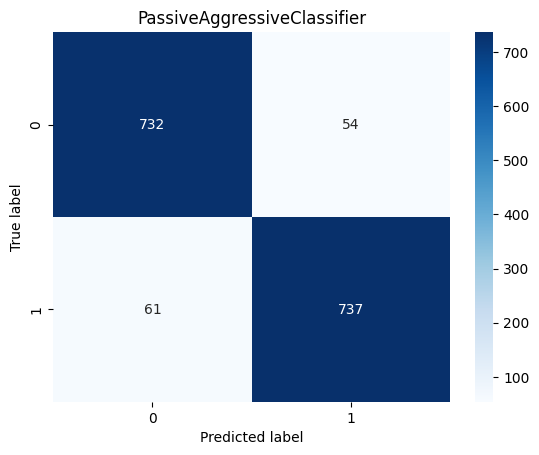

In [93]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("PassiveAggressiveClassifier")
plt.show()

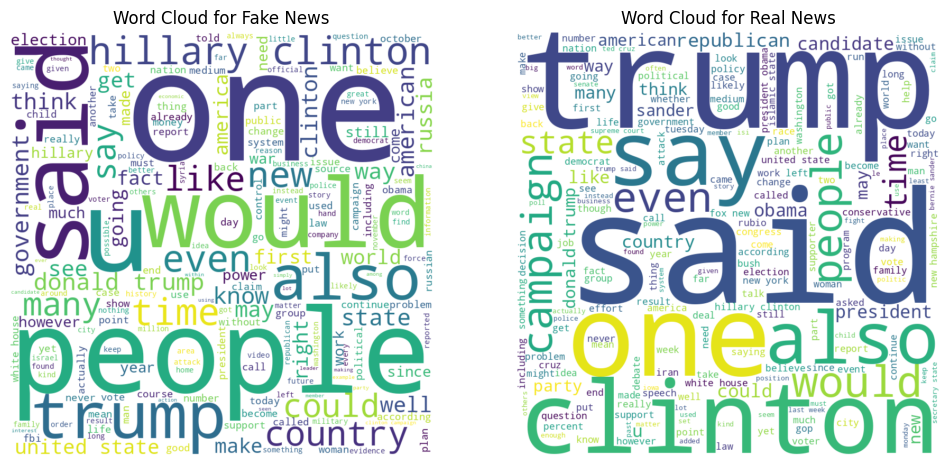

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter fake and real news data
fake_news_data = News_Data[News_Data['label'] == 'FAKE']
real_news_data = News_Data[News_Data['label'] == 'REAL']

# Generate word cloud for fake news
fake_text = ' '.join(fake_news_data['Joined_Data'])
fake_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwordsObj,
                min_font_size = 10).generate(fake_text)

# Generate word cloud for real news
real_text = ' '.join(real_news_data['Joined_Data'])
real_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwordsObj,
                min_font_size = 10).generate(real_text)

# Plot the word clouds
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')

plt.show()
